 Summer Avg GPA =[3.16, 3.14, 3.15, 3.19, 3.21, 3.21, 3.23]
 Non-Summer Avg GPA =[3.12, 3.12, 3.16, 3.2, 3.2, 3.19, 3.23]

 Summer Avg expected GPA =[3.48, 3.46, 3.5, 3.49, 3.5, 3.5, 3.49]
 Non-Summer Avg expected GPA =[3.46, 3.44, 3.48, 3.48, 3.47, 3.45, 3.47]

 Summer Avg Enrollment =[48, 47, 47, 45, 47, 49, 46]
 Non-Summer Avg Enrollment =[130, 126, 123, 120, 130, 131, 124]



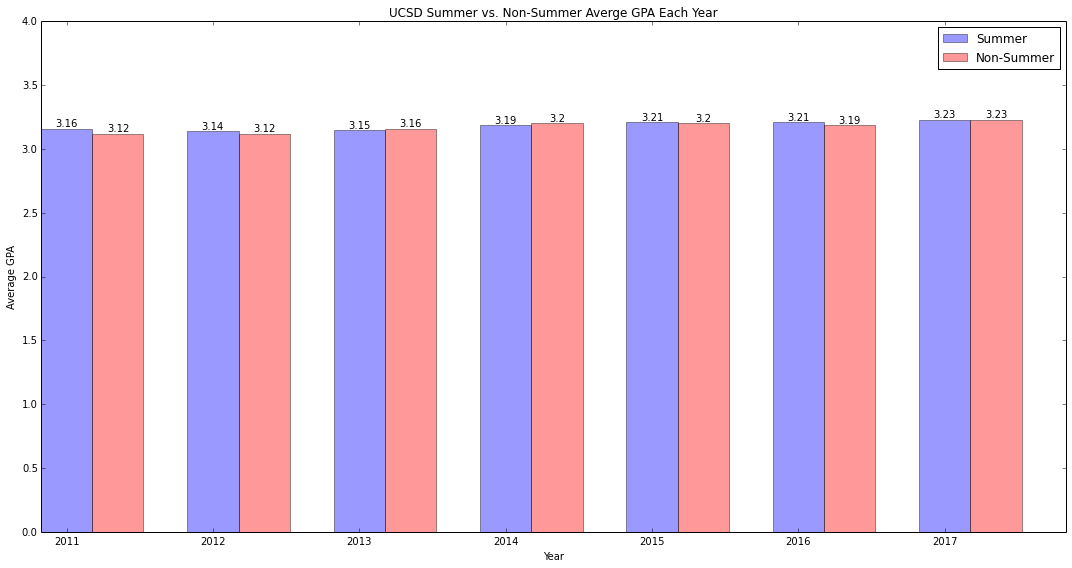

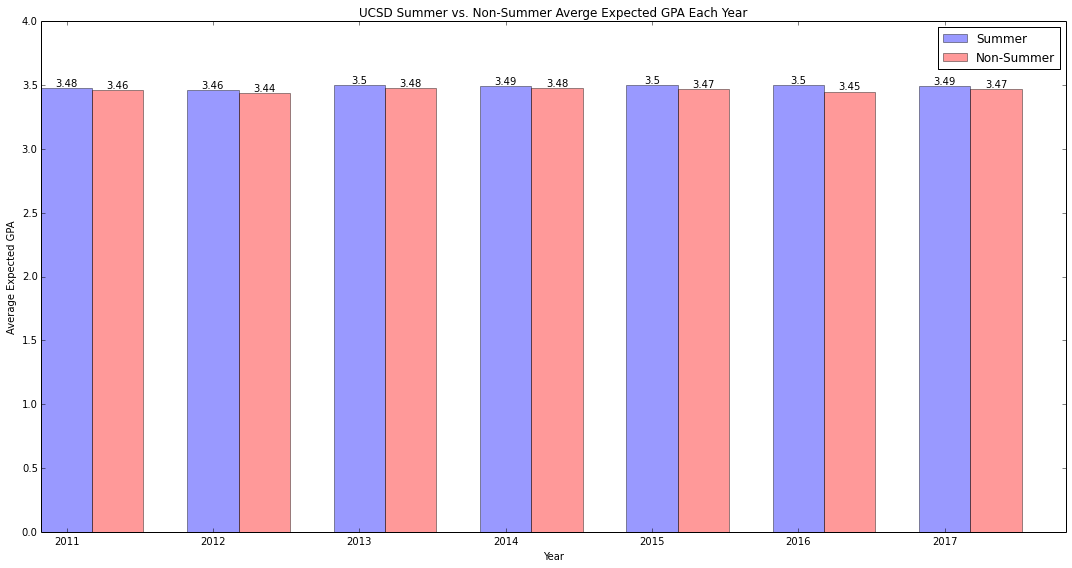

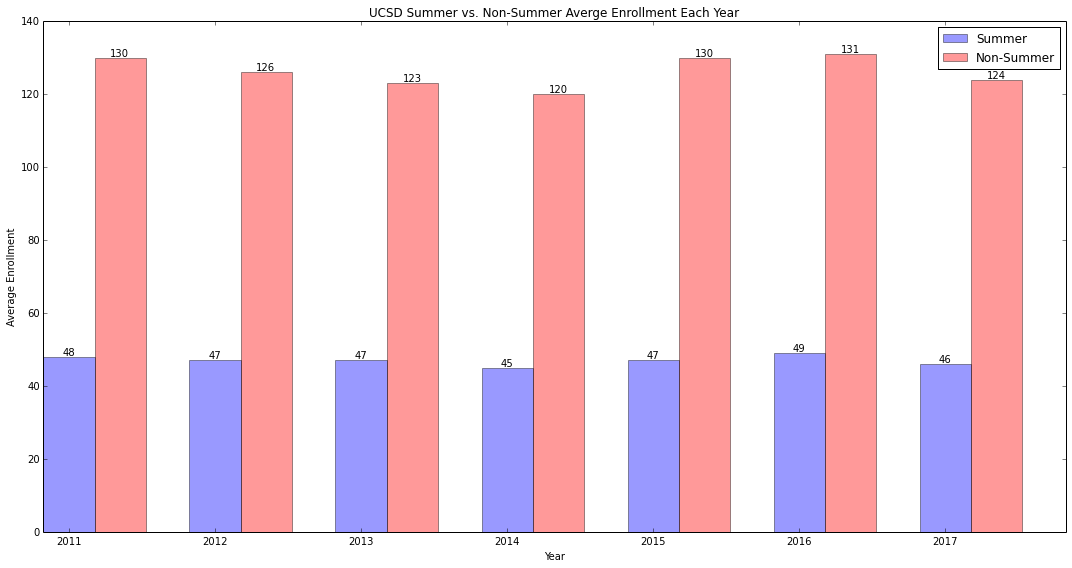

In [37]:
from analysis_modules import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import urllib2
%matplotlib inline

def extract_years(year):
    '''
    extract last two digital of the input interger
    
    Arguments:
        year: year interger 
    '''
    last_2_dig_of_year = '0'+str(abs(year)%100) if abs(year)%100<10 else str(abs(year)%100)
    return last_2_dig_of_year

def add_value_lable(ax,data1,data2):
    '''
    Function to output value label on top of the double bar graph
    
    Arguments:
        ax {plt object} 
        data1: list of data  
        data2:list of data  
    '''
    rects = ax.patches
    # Make some labels.
    labels = data1+data2
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height , label,ha='center', va='bottom')
        
#fig=plt.figure(figsize=(10, 8))
dtf = make_pandas('ucsd.txt')
terms = ['S', 'NS']
#NS_course = dtf.loc[dtf['Summer?'] == terms[1],:]
#S_course = dtf.loc[dtf['Summer?'] == terms[0],:]
years = []
S_Year_GPA=[]
NS_Year_GPA=[]

S_Year_expected_GPA=[]
NS_Year_expected_GPA=[]

S_Year_enroll=[]
NS_Year_enroll=[]
start_year = 2011
end_year = 2017
for i in range(start_year, end_year+1):
    years.append(i)
    S_Year_GPA.append(round(average_GPA(dtf, summer = True, year = extract_years(i), expected = False),2))
    NS_Year_GPA.append(round(average_GPA(dtf, summer = False, year = extract_years(i), expected = False),2))
    
    S_Year_expected_GPA.append(round(average_GPA(dtf, summer = True, year = extract_years(i), expected = True),2))
    NS_Year_expected_GPA.append(round(average_GPA(dtf, summer = False, year = extract_years(i), expected = True),2))
    
    S_Year_enroll.append(int(average_enrollment(dtf, summer = True, year = extract_years(i))))
    NS_Year_enroll.append(int(average_enrollment(dtf, summer = False, year = extract_years(i))))

    S_Year_GPA[i-start_year] = 0 if math.isnan(S_Year_GPA[i-start_year]) else S_Year_GPA[i-start_year]
    NS_Year_GPA[i-start_year] = 0 if math.isnan(NS_Year_GPA[i-start_year]) else NS_Year_GPA[i-start_year]
    S_Year_expected_GPA[i-start_year] = 0 if math.isnan(S_Year_expected_GPA[i-start_year]) else S_Year_expected_GPA[i-start_year]
    NS_Year_expected_GPA[i-start_year] = 0 if math.isnan(NS_Year_expected_GPA[i-start_year]) else NS_Year_expected_GPA[i-start_year]
    S_Year_enroll[i-start_year] = 0 if math.isnan(S_Year_enroll[i-start_year]) else S_Year_enroll[i-start_year]
    NS_Year_enroll[i-start_year] = 0 if math.isnan(NS_Year_enroll[i-start_year]) else NS_Year_enroll[i-start_year]
    
print " Summer Avg GPA =" + str(S_Year_GPA)
print " Non-Summer Avg GPA =" + str(NS_Year_GPA)+'\n'

print " Summer Avg expected GPA =" + str(S_Year_expected_GPA)
print " Non-Summer Avg expected GPA =" + str(NS_Year_expected_GPA)+'\n'

print " Summer Avg Enrollment =" + str(S_Year_enroll)
print " Non-Summer Avg Enrollment =" + str(NS_Year_enroll)+'\n'

n_groups = len(years)
fig, ax = plt.subplots(figsize=(15, 8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
#error_config = {'ecolor': '0.3'}
rects1 = ax.bar(index, S_Year_GPA, bar_width,alpha=opacity, color='b',label='Summer')
rects2 = ax.bar(index + bar_width, NS_Year_GPA, bar_width,alpha=opacity, color='r',label='Non-Summer')
plt.ylim([0, 4.0])
ax.set_xlabel('Year')
ax.set_ylabel('Average GPA')
ax.set_title('UCSD Summer vs. Non-Summer Averge GPA Each Year')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend()
add_value_lable(ax,S_Year_GPA,NS_Year_GPA)
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(figsize=(15, 8))
rects3 = ax1.bar(index, S_Year_expected_GPA, bar_width,alpha=opacity, color='b',label='Summer')
rects4 = ax1.bar(index + bar_width, NS_Year_expected_GPA, bar_width,alpha=opacity, color='r',label='Non-Summer')
plt.ylim([0, 4.0])
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Expected GPA')
ax1.set_title('UCSD Summer vs. Non-Summer Averge Expected GPA Each Year')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(years)
ax1.legend()
add_value_lable(ax1,S_Year_expected_GPA,NS_Year_expected_GPA)
fig1.tight_layout()
plt.show()


fig2, ax2 = plt.subplots(figsize=(15, 8))
rects5 = ax2.bar(index, S_Year_enroll, bar_width, alpha=opacity, color='b',label='Summer')
rects6 = ax2.bar(index + bar_width, NS_Year_enroll, bar_width,alpha=opacity, color='r',label='Non-Summer')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Enrollment')
ax2.set_title('UCSD Summer vs. Non-Summer Averge Enrollment Each Year')
ax2.set_xticks(index + bar_width / 2)
ax2.set_xticklabels(years)
ax2.legend()
add_value_lable(ax2,S_Year_enroll,NS_Year_enroll)
fig2.tight_layout()
plt.show()

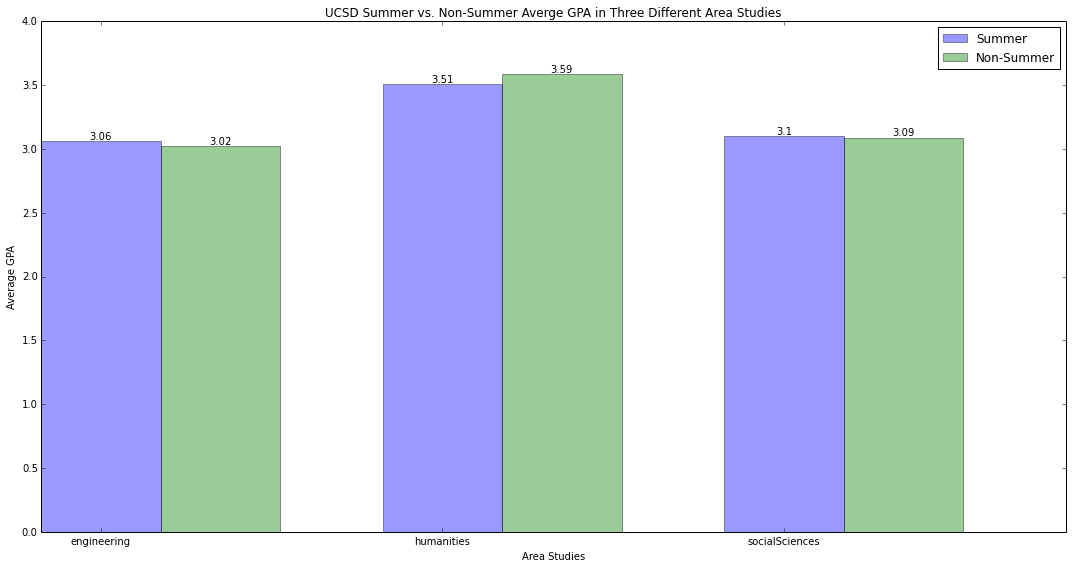

In [38]:
engineering = make_pandas('engineering.txt')
humanities = make_pandas('humanities.txt')
socialSciences = make_pandas('socialSciences.txt')

area_studies=['engineering','humanities','socialSciences']
S_area_studies_avg_gpa = []
NS_area_studies_avg_gpa = []
S_area_studies_avg_gpa.append(round(average_GPA(engineering, summer = True, year = 'all', expected = False),2))
S_area_studies_avg_gpa.append(round(average_GPA(humanities, summer = True, year = 'all', expected = False),2))
S_area_studies_avg_gpa.append(round(average_GPA(socialSciences, summer = True, year = 'all', expected = False),2))

NS_area_studies_avg_gpa.append(round(average_GPA(engineering, summer = False, year = 'all', expected = False),2))
NS_area_studies_avg_gpa.append(round(average_GPA(humanities, summer = False, year = 'all', expected = False),2))
NS_area_studies_avg_gpa.append(round(average_GPA(socialSciences, summer = False, year = 'all', expected = False),2))

n_groups = 3
fig3, ax3 = plt.subplots(figsize=(15, 8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

rects7 = ax3.bar(index, S_area_studies_avg_gpa, bar_width, alpha=opacity, color='b',label='Summer')
rects8 = ax3.bar(index + bar_width, NS_area_studies_avg_gpa, bar_width,alpha=opacity, color='g',label='Non-Summer')
ax3.set_xlabel('Area Studies')
ax3.set_ylabel('Average GPA')
ax3.set_title('UCSD Summer vs. Non-Summer Averge GPA in Three Different Area Studies ')
ax3.set_xticks(index + bar_width / 2)
ax3.set_xticklabels(area_studies)
ax3.legend()
add_value_lable(ax3,S_area_studies_avg_gpa,NS_area_studies_avg_gpa)
fig3.tight_layout()
plt.show()

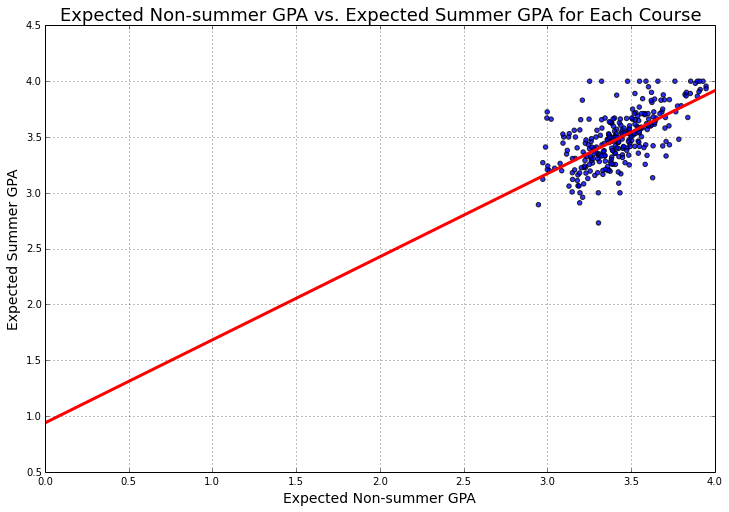

('slope:', 0.74412349648175624, 'intercept:', 0.93829008289273208, 'r_value:', 0.63872465202307693, 'p_value:', 2.0471005393586422e-34)


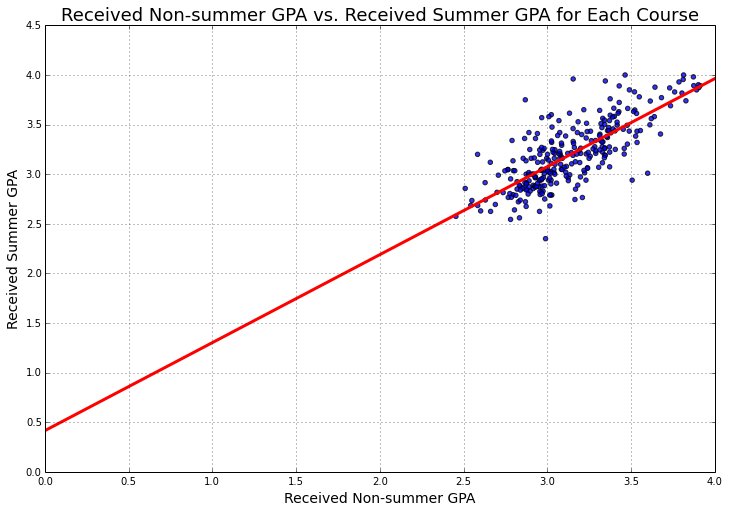

('slope:', 0.74412349648175624, 'intercept:', 0.93829008289273208, 'r_value:', 0.63872465202307693, 'p_value:', 2.0471005393586422e-34)


In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from analysis_modules import *
%matplotlib inline

summer = 'S' #'S' or 'NS'
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
names = dtf[dtf['Summer?'] == summer]['Course Name'].unique()

expected_GPA_S = []
expected_GPA_NS = []
Received_GPA_S = []
Received_GPA_NS = []

for name in names:
    hours.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['Hrs/Week'].mean())
    received.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['GPA Received'].mean())
    expected_GPA_S.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == 'S')]['GPA Expected'].mean())
    expected_GPA_NS.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == 'NS')]['GPA Expected'].mean())
    Received_GPA_S.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == 'S')]['GPA Received'].mean())
    Received_GPA_NS.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == 'NS')]['GPA Received'].mean())

expected_GPA_dtf = pd.DataFrame({'Course Name': names, 'expected summer GPA': expected_GPA_S, 'expected GPA': expected_GPA_NS})
Received_GPA_dtf = pd.DataFrame({'Course Name': names, 'summer GPA': Received_GPA_S, 'GPA': Received_GPA_NS})

slope, intercept, r_value, p_value, std_err = stats.linregress(expected_GPA_dtf['expected GPA'], expected_GPA_dtf['expected summer GPA'])

values = [slope * i + intercept for i in [0, 4]]

fig=plt.figure(figsize=(12, 8))
plt.scatter(expected_GPA_dtf['expected GPA'], expected_GPA_dtf['expected summer GPA'], s=20, alpha=0.8, label=None)
plt.plot([0, 4], values, 'b', c='red', label = 'Regression Line', linewidth=3)

plt.title("Expected Non-summer GPA vs. Expected Summer GPA for Each Course",fontsize = 18)

plt.xlabel('Expected Non-summer GPA',fontsize=14)
plt.ylabel('Expected Summer GPA',fontsize=14)
plt.xlim(0, 4)
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

###########################################################################################
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(Received_GPA_dtf['GPA'], Received_GPA_dtf['summer GPA'])

values2 = [slope2 * i + intercept2 for i in [0, 4]]

fig2=plt.figure(figsize=(12, 8))
plt.scatter(Received_GPA_dtf['GPA'], Received_GPA_dtf['summer GPA'], s=20, alpha=0.8, label=None)
plt.plot([0, 4], values2, 'b', c='red', label = 'Regression Line', linewidth=3)

plt.title("Received Non-summer GPA vs. Received Summer GPA for Each Course",fontsize = 18)

plt.xlabel('Received Non-summer GPA',fontsize=14)
plt.ylabel('Received Summer GPA',fontsize=14)
plt.xlim(0, 4)
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)